In [1]:
import tensorflow as tf

In [2]:
input1 = tf.constant(30, dtype=tf.int32)
input2 = tf.constant(12, dtype=tf.int32)

In [3]:
input1

<tf.Tensor: shape=(), dtype=int32, numpy=30>

In [4]:
output = tf.add(input1, input2)

#### tf.add executes the addition. It defines an EagerTensor that gets executed immediately

In [5]:
output

<tf.Tensor: shape=(), dtype=int32, numpy=42>

### @tf.function is a „magic“ decorator that tells the AutoGraph compiler to compile this function into graph code

In [6]:
@tf.function
def my_custom_add_fn():
    input1 = tf.constant(30, dtype=tf.int32) 
    input2 = tf.constant(12, dtype=tf.int32)
    
    output = tf.add(input1, input2)
    return output

#### fn is not yet executed

In [7]:
print(my_custom_add_fn)

#### Graph is built and the fn will be executed

In [8]:
executed_fn = my_custom_add_fn()

In [9]:
print(executed_fn.numpy())

42


In [10]:
print(executed_fn)

tf.Tensor(42, shape=(), dtype=int32)


## NOTE!
1. Default mode is <i>eager mode</i>, i.e., you can call any operation, tensor, etc. and see the results immediately
2. <i>AutoGraph</i> compiles your eager code into graph code automatically
3. If you want to execute something on the graph, add <b>@tf.function</b> decorator:

   3.1 “When you annotate a function with tf.function, you can still call it like any other function. But it will be compiled into a graph, which means you get the benefits of faster execution, running on GPU or TPU, or exporting to SavedModel.”
   
   
4. Data in Tensorflow are represented by Tensors
5. All data elements in a tensor share the same data type

### Feeding data dynamically into the graph

In [11]:
@tf.function
def my_custom_add_fn_dyn(input1, input2):
    # you can feed arbitrary numpy inputs or variables
    output = tf.add(input1, input2) 
    return output

In [12]:
print(my_custom_add_fn_dyn(5, 7).numpy())

12


In [13]:
print(my_custom_add_fn_dyn(5, 12).numpy())

17


-----

### Variables are objects in TensorFlow 2.x


In [14]:
increment = tf.constant(1, dtype=tf.int32)

In [15]:
increment

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [16]:
accumulator = tf.Variable(initial_value=0, dtype=tf.int32) 
accumulator

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0>

In [17]:
result = tf.add(increment, accumulator)
result

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [18]:
accumulator.assign_add(result)
accumulator

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>

In [19]:
accumulator.assign_add(result)
accumulator

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=2>

In [20]:
accumulator.assign_add(result)
accumulator

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>

In [21]:
accumulator2 = tf.Variable(initial_value = 2, dtype = tf.int32)
accumulator2

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=2>

In [22]:
result2 = tf.add(increment, accumulator2)
result2

<tf.Tensor: shape=(), dtype=int32, numpy=3>

#### As we build layers etc., we will probably get all variables in a model. To easily di this, implement Layer subclasses

In [23]:
class MyLayer(tf.keras.layers.Layer):
    
    def __init__(self):
        super(MyLayer, self).__init__()
        self.my_var = tf.Variable(1.0, name = 'my_var')
        self.my_var_list = [tf.Variable(x) for x in range(10)]
    
    
class MyOtherLayer(tf.keras.layers.Layer):
    
    def __init__(self):
        super(MyOtherLayer, self).__init__() 
        self.sublayer = MyLayer() 
        self.my_other_var = tf.Variable(10.0, name = 'my_other_var')

In [24]:
m = MyOtherLayer()
print(len(m.variables))

12


In [25]:
m.variables

[<tf.Variable 'my_other_var:0' shape=() dtype=float32, numpy=10.0>,
 <tf.Variable 'my_var:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0>,
 <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>,
 <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=2>,
 <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>,
 <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=4>,
 <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>,
 <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=6>,
 <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=7>,
 <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=8>,
 <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=9>]

----

In [27]:
from PIL import Image
import numpy as np

#### Image I/O

In [30]:
img = Image.open(r'weihnachtsmarkt-augsburg.jpg')

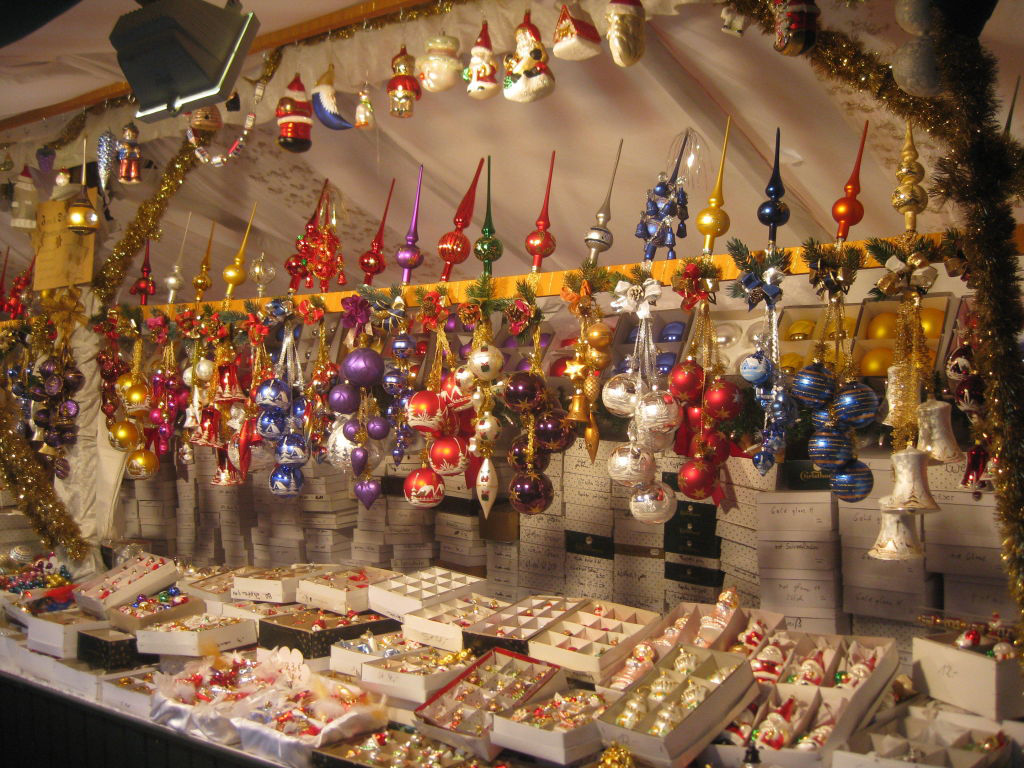

In [31]:
img

#### Access pixel data through numpy

In [32]:
img_data = np.array(img)
img_data

array([[[ 12,  14,  13],
        [ 12,  14,  13],
        [ 12,  14,  13],
        ...,
        [112,  81,  61],
        [112,  81,  61],
        [111,  83,  62]],

       [[ 13,  15,  14],
        [ 13,  15,  14],
        [ 13,  15,  14],
        ...,
        [110,  82,  61],
        [110,  83,  62],
        [110,  83,  62]],

       [[ 15,  17,  16],
        [ 14,  16,  15],
        [ 14,  16,  15],
        ...,
        [108,  83,  61],
        [109,  84,  62],
        [109,  84,  62]],

       ...,

       [[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [ 36,  31,  28],
        [ 37,  32,  29],
        [ 37,  32,  29]],

       [[  8,   8,   8],
        [  8,   8,   8],
        [  7,   7,   7],
        ...,
        [ 36,  31,  28],
        [ 36,  31,  28],
        [ 36,  31,  28]],

       [[  8,   8,   8],
        [  8,   8,   8],
        [  7,   7,   7],
        ...,
        [ 36,  31,  28],
        [ 35,  30,  27],
        [ 35,  30,  27]]

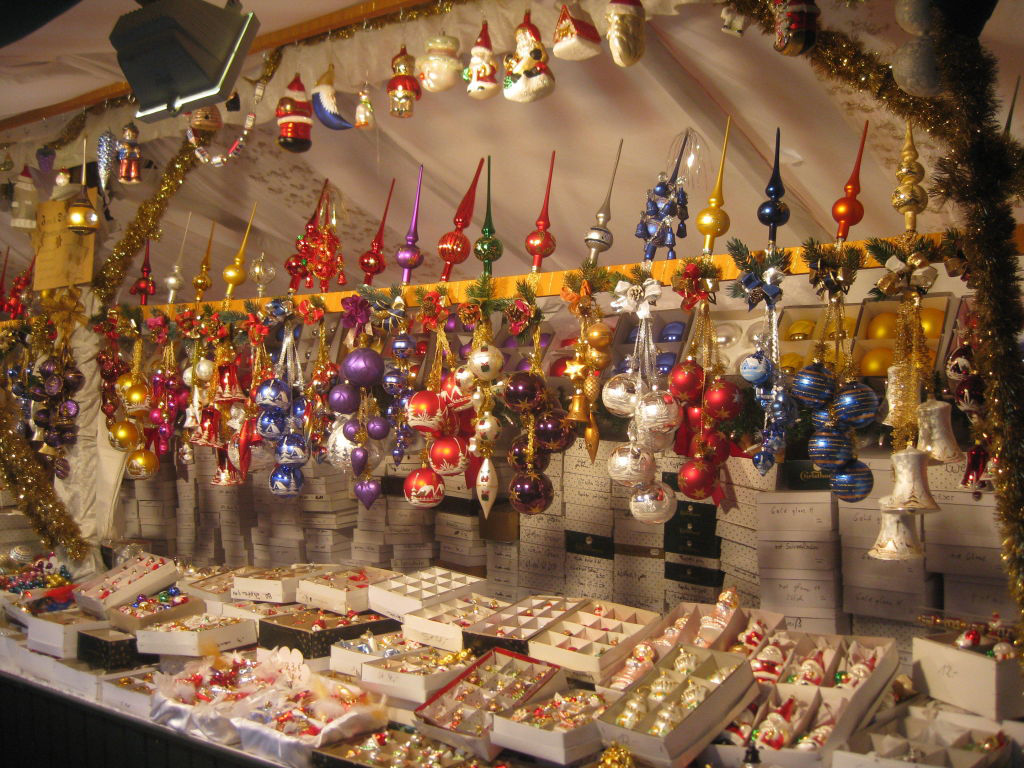

In [33]:
img = Image.fromarray(img_data)
img